In [1]:
from parseData import create_dataset
training_data_table, testing_data_table = create_dataset("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1000, 500)

In [2]:
y1_count = 0
y0_count = 0
for i in range(len(training_data_table)-1):
    if training_data_table[i + 1][-1] == 1:
        y1_count += 1
    else:
        y0_count += 1
y1_prob = y1_count/(len(training_data_table)-1)
y0_prob = y0_count/(len(training_data_table)-1)

y1_prob, y0_prob

(0.5, 0.5)

In [3]:
'''
prior_knowledge is a dict of list. dict[word] = [probX_Y1, probX_Y0]
'''
prior_knowledge = dict()
vocabulary = len(training_data_table[0])
word_num_y1 = 0
word_num_y0 = 0
for i in range(len(training_data_table)-1):
    if training_data_table[i+1][-1] == 1:
        word_num_y1 += sum(training_data_table[i+1])-1
    else:
        word_num_y0 += sum(training_data_table[i+1])


for i in range(len(training_data_table[0])):
    x1_count = 0
    x0_count = 0
    for j in range(len(training_data_table)-1):
        if training_data_table[j+1][-1] == 1:
            x1_count += training_data_table[j+1][i]
        else:
            x0_count += training_data_table[j+1][i]
    prob_x = [(x1_count+1)/(word_num_y1+vocabulary), (x0_count+1)/(word_num_y0+vocabulary)]
    prior_knowledge[training_data_table[0][i]] = prob_x



In [6]:
import numpy as np
# predicted_class_labels = [0] * (len(testing_data_table)-1)

correct_count = 0
for i in range(1, len(testing_data_table)):
    prob_Y1 = np.log(y1_prob)
    prob_Y0 = np.log(y0_prob)
    for j in range(len(testing_data_table[0])):
        if testing_data_table[0][j] in prior_knowledge.keys():
            [probX_Y1, probX_Y0] = prior_knowledge[testing_data_table[0][j]]
            prob_Y1 += np.log(probX_Y1) * testing_data_table[i][j]
            prob_Y0 += np.log(probX_Y0) * testing_data_table[i][j]
    predicted_class_label = 1 if prob_Y1 >= prob_Y0 else 0
    if predicted_class_label == testing_data_table[i][-1]:
        correct_count += 1
accuracy = correct_count / (len(testing_data_table)-1)

accuracy       # on the same dataset


[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.4695647707967]
[-300.24628245888687, -290.469564

KeyboardInterrupt: 

In [1]:
# now, start to implement transfer learning for highly relevant dataset
from parseData import create_dataset
training_data_table_transfer, testing_data_table_transfer = create_dataset("./20news-18828/talk.politics.guns", "./20news-18828/misc.forsale", 100, 500)

In [19]:
import numpy as np
correct_count_transfer = 0
for i in range(1, len(testing_data_table_transfer)):
    prob_Y1 = np.log(y1_prob)
    prob_Y0 = np.log(y0_prob)
    for j in range(len(testing_data_table_transfer[0])):
        if testing_data_table_transfer[0][j] in prior_knowledge.keys():
            [probX_Y1, probX_Y0] = prior_knowledge[testing_data_table_transfer[0][j]]
            prob_Y1 += np.log(probX_Y1) * testing_data_table_transfer[i][j]
            prob_Y0 += np.log(probX_Y0) * testing_data_table_transfer[i][j]
    predicted_class_label = 1 if prob_Y1 >= prob_Y0 else 0
    if predicted_class_label == testing_data_table_transfer[i][-1]:
        correct_count_transfer += 1
accuracy_transfer = correct_count_transfer / (len(testing_data_table_transfer)-1)

accuracy_transfer       # directly transfered, not optimized for the new dataset

0.588

In [20]:
y1_count_transfer = 0
y0_count_transfer = 0
for i in range(len(training_data_table_transfer)-1):
    if training_data_table_transfer[i + 1][-1] == 1:
        y1_count_transfer += 1
    else:
        y0_count_transfer += 1
y1_prob_transfer = y1_count_transfer/(len(training_data_table_transfer)-1)
y0_prob_transfer = y0_count_transfer/(len(training_data_table_transfer)-1)

y1_prob_transfer, y0_prob_transfer

(0.5, 0.5)

In [21]:
prior_knowledge_transfer = dict()
vocabulary = len(training_data_table_transfer[0])
word_num_y1 = 0
word_num_y0 = 0
for i in range(len(training_data_table_transfer)-1):
    if training_data_table_transfer[i+1][-1] == 1:
        word_num_y1 += sum(training_data_table_transfer[i+1])-1
    else:
        word_num_y0 += sum(training_data_table_transfer[i+1])


for i in range(len(training_data_table_transfer[0])):
    x1_count = 0
    x0_count = 0
    for j in range(len(training_data_table_transfer)-1):
        if training_data_table_transfer[j+1][-1] == 1:
            x1_count += training_data_table_transfer[j+1][i]
        else:
            x0_count += training_data_table_transfer[j+1][i]
    prob_x = [(x1_count+1)/(word_num_y1+vocabulary), (x0_count+1)/(word_num_y0+vocabulary)]
    prior_knowledge_transfer[training_data_table_transfer[0][i]] = prob_x

In [22]:
# calculate the relevance
positive_common_prob = 0
positive_common_prob_transfer = 0

negative_common_prob = 0
negative_common_prob_transfer = 0

for word in prior_knowledge.keys():
    if word in prior_knowledge_transfer.keys():
        positive_common_prob += prior_knowledge[word][0]
        positive_common_prob_transfer += prior_knowledge_transfer[word][0]
        negative_common_prob += prior_knowledge[word][1]
        negative_common_prob_transfer += prior_knowledge_transfer[word][1]

positive_common_prob, positive_common_prob_transfer, negative_common_prob, negative_common_prob_transfer

(0.6396467389375324, 0.7785061166547944, 0.6929788587994359, 0.75481209899171)

In [23]:
positive_max_prob = 0
negative_max_prob = 0
positive_sum_prob = 0
negative_sum_prob = 0

for word in prior_knowledge.keys():
    positive_sum_prob += prior_knowledge[word][0]
    negative_sum_prob += prior_knowledge[word][1]
    if prior_knowledge[word][0] > positive_max_prob:
        positive_max_prob = prior_knowledge[word][0]
    if prior_knowledge[word][1] > negative_max_prob:
        negative_max_prob = prior_knowledge[word][1]

positive_max_prob_transfer = 0
negative_max_prob_transfer = 0
positive_sum_prob_transfer = 0
negative_sum_prob_transfer = 0

for word in prior_knowledge_tra*er.keys():
    positive_sum_prob_transfer += prior_knowledge_transfer[word][0]
    negative_sum_prob_transfer += prior_knowledge_transfer[word][1]
    if prior_knowledge_transfer[word][0] > positive_max_prob_transfer:
        positive_max_prob_transfer = prior_knowledge_transfer[word][0]
    if prior_knowledge_transfer[word][1] > negative_max_prob_transfer:
        negative_max_prob_transfer = prior_knowledge_transfer[word][1]


In [24]:
positive_relevance = (positive_common_prob/positive_max_prob * positive_common_prob_transfer/positive_max_prob_transfer)/(positive_sum_prob/positive_max_prob * positive_sum_prob_transfer/positive_max_prob_transfer)

positive_relevance

0.4979688987609627

In [25]:
negative_relevance = (negative_common_prob/negative_max_prob * negative_common_prob_transfer/negative_max_prob_transfer)/(negative_sum_prob/negative_max_prob * negative_sum_prob_transfer/negative_max_prob_transfer)

negative_relevance

0.5230688269669126

In [26]:
overall_common_prob = positive_common_prob + negative_common_prob
overall_common_prob_transfer = positive_common_prob_transfer + negative_common_prob_transfer
overall_max_prob = max([positive_max_prob, negative_max_prob])
overall_max_prob_transfer = max([positive_max_prob_transfer, negative_max_prob_transfer])
overall_sum_prob = positive_sum_prob + negative_sum_prob
overall_sum_prob_transfer = positive_sum_prob_transfer + negative_sum_prob_transfer

overall_relevance = (overall_common_prob/overall_max_prob * overall_common_prob_transfer/overall_max_prob_transfer)/(overall_sum_prob/overall_max_prob * overall_sum_prob_transfer/overall_max_prob_transfer)

overall_relevance

0.5108347759114437

In [27]:
# retrain

# if overall relevance is ok, but negative relevance is low, we are going to substitute the negative prob of common words in pre-model by target model
common_pair = [[pair[0], pair[1][1]] for pair in prior_knowledge.items() if pair[0] in prior_knowledge_transfer.keys()]
common_pair.sort(key = lambda x:x[1], reverse=True)
top_negative_words = [pair[0] for pair in common_pair[0:int(len(common_pair)/4)]]

In [28]:
import numpy as np
correct_count_transfer = 0
for i in range(1, len(testing_data_table_transfer)):
    prob_Y1 = np.log(y1_prob)
    prob_Y0 = np.log(y0_prob)
    for j in range(len(testing_data_table_transfer[0])):
        if testing_data_table_transfer[0][j] in prior_knowledge.keys():
            [probX_Y1, probX_Y0] = prior_knowledge[testing_data_table_transfer[0][j]]
            if testing_data_table_transfer[0][j] in top_negative_words:
                probX_Y0 = prior_knowledge_transfer[testing_data_table_transfer[0][j]][1]
            prob_Y1 += np.log(probX_Y1) * testing_data_table_transfer[i][j]
            prob_Y0 += np.log(probX_Y0) * testing_data_table_transfer[i][j]
    predicted_class_label = 1 if prob_Y1 >= prob_Y0 else 0
    if predicted_class_label == testing_data_table_transfer[i][-1]:
        correct_count_transfer += 1
accuracy_transfer = correct_count_transfer / (len(testing_data_table_transfer)-1)

accuracy_transfer       # directly transfered, not optimized for the new dataset

0.794

In [10]:
import numpy as np
correct_count_transfer = 0
for i in range(1, len(testing_data_table_transfer)):
    prob_Y1 = np.log(y1_prob_transfer)
    prob_Y0 = np.log(y0_prob_transfer)
    for j in range(len(testing_data_table_transfer[0])):
        if testing_data_table_transfer[0][j] in prior_knowledge_transfer.keys():
            [probX_Y1, probX_Y0] = prior_knowledge_transfer[testing_data_table_transfer[0][j]]
            prob_Y1 += np.log(probX_Y1) * testing_data_table_transfer[i][j]
            prob_Y0 += np.log(probX_Y0) * testing_data_table_transfer[i][j]
    predicted_class_label = 1 if prob_Y1 >= prob_Y0 else 0
    if predicted_class_label == testing_data_table_transfer[i][-1]:
        correct_count_transfer += 1
accuracy_transfer = correct_count_transfer / (len(testing_data_table_transfer)-1)

accuracy_transfer

0.946

In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v2
NB_relevant_NB_retraining_v2("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/talk.politics.guns", "./20news-18828/misc.forsale", 50, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.894
accuracy(directly_transfer):  0.498
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.944


(0.894, 0.498, 0.944)

In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v2
NB_relevant_NB_retraining_v2("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/talk.politics.guns", "./20news-18828/misc.forsale", 50, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.894
accuracy(directly_transfer):  0.498
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.944


(0.894, 0.498, 0.944)

In [2]:
from NB_Relevance import NB_relevant_NB_retraining_v2
NB_relevant_NB_retraining_v2("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/comp.windows.x", "./20news-18828/comp.sys.mac.hardware", 50, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.938
accuracy(directly_transfer):  0.526
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.896


(0.938, 0.526, 0.896)

In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v3
NB_relevant_NB_retraining_v3("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/comp.windows.x", "./20news-18828/comp.sys.mac.hardware", 50, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.938
accuracy(directly_transfer):  0.526
accuracy_relevant_transfer:  0.528
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.816


(0.938, 0.526, 0.816)

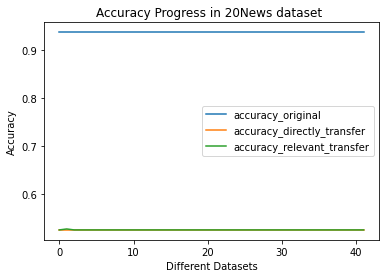

In [3]:
from matplotlib import pyplot as plt
plt.plot(range(len(accuracy_original_list2)), accuracy_original_list2, label='accuracy_original')
plt.plot(range(len(accuracy_transfer_list2)), accuracy_transfer_list2, label='accuracy_directly_transfer')
plt.plot(range(len(accuracy_progress_list2)), accuracy_progress_list2, label='accuracy_relevant_transfer')

plt.title('Accuracy Progress in 20News dataset ')
plt.xlabel('Different Datasets')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v4
NB_relevant_NB_retraining_v4("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/comp.windows.x", "./20news-18828/comp.sys.mac.hardware", 50, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.938
accuracy(directly_transfer):  0.526
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.5


(0.938, 0.526, 0.5)

In [2]:
from NB_Relevance import NB_relevant_NB_retraining_v3
NB_relevant_NB_retraining_v3("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/comp.windows.x", "./20news-18828/comp.sys.mac.hardware", 800, 500)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.978
accuracy(directly_transfer):  0.514
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.968


(0.978, 0.514, 0.968)

In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v3_analysis
NB_relevant_NB_retraining_v3_analysis("./20news-18828/comp.os.ms-windows.misc", "./20news-18828/comp.sys.ibm.pc.hardware", 1200, 0, "./20news-18828/comp.windows.x", "./20news-18828/comp.sys.mac.hardware", 800, 500)


600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
4
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
3
0
598
600
2
0
598
600
2
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
4
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600

In [2]:
NB_relevant_NB_retraining_v3_analysis("./20news-18828/talk.politics.guns", "./20news-18828/talk.politics.mideast", 1200, 0, "./20news-18828/comp.graphics", "./20news-18828/comp.sys.ibm.pc.hardware", 800, 400)

0
1
0
597
600
3
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
598
600
2
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
599
600
1
0
597
600
3
0
599
600
1
0
595
600
7
0
598
600
2
0
599
600
1
0
599
600
1


In [1]:
from NB_Relevance import NB_relevant_NB_retraining_v3_analysis
NB_relevant_NB_retraining_v3_analysis("./20news-18828/rec.sport.hockey", "./20news-18828/rec.motorcycles", 1200, 0, "./20news-18828/rec.sport.baseball", "./20news-18828/rec.autos", 800, 400)

Pre-model is built
Target-model is built
accuracy(no_transfer):  0.925
accuracy(directly_transfer):  0.9075
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.9325


In [1]:
from NB_Relevance_amazon import NB_relevant_NB_retraining_v3

no_transfer = [0] * 5
transfered = [0] * 5
no_transfer[0], acc, transfered[0] = NB_relevant_NB_retraining_v3('Toys_and_Games.json.gz', 10000, 0, 'Patio_Lawn_and_Garden.json.gz', 5000, 5000)
no_transfer[1], acc, transfered[1] = NB_relevant_NB_retraining_v3('Video_Games.json.gz', 10000, 0, 'Toys_and_Games.json.gz', 5000, 5000)
no_transfer[2], acc, transfered[2] = NB_relevant_NB_retraining_v3('Software.json.gz', 10000, 0, 'Video_Games.json.gz', 5000, 5000)
no_transfer[3], acc, transfered[3] = NB_relevant_NB_retraining_v3('Electronics.json.gz', 10000, 0, 'Toys_and_Games.json.gz', 5000, 5000)
no_transfer[4], acc, transfered[4] = NB_relevant_NB_retraining_v3('Patio_Lawn_and_Garden.json.gz', 10000, 0, 'Electronics.json.gz', 5000, 5000)

Pre-model is built
Target-model is built
6559
12532
accuracy(no_transfer):  0.769
accuracy(directly_transfer):  0.6876
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.7696
Pre-model is built
Target-model is built
8159
18769
accuracy(no_transfer):  0.9192
accuracy(directly_transfer):  0.8804
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.9172
Pre-model is built
Target-model is built
7946
14735
accuracy(no_transfer):  0.737
accuracy(directly_transfer):  0.8678
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.736
Pre-model is built
Target-model is built
7687
15149
accuracy(no_transfer):  0.9192
accuracy(directly_transfer):  0.8546
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.9202
Pre-model is built
Target-model is built
7062
13840
accuracy(no_transfer):  0.737
accuracy(directly_transfer):  0.8288
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.7352


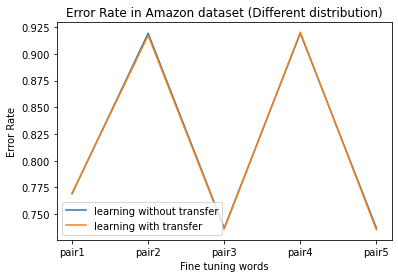

In [2]:
from matplotlib import pyplot as plt
x_axis = ['pair1', 'pair2', 'pair3', 'pair4', 'pair5']
plt.plot(x_axis, no_transfer, label='learning without transfer')
plt.plot(x_axis, transfered, label='learning with transfer')

plt.title('Error Rate in Amazon dataset (Different distribution)')
plt.xlabel('Fine tuning words')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

In [7]:
no_transfer[2], acc, transfered[2] = NB_relevant_NB_retraining_v3('Software.json.gz', 10000, 0, 'Video_Games.json.gz', 5000, 5000)

Pre-model is built
Target-model is built
9743
21344
accuracy(no_transfer):  0.788
accuracy(directly_transfer):  0.732
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.7878


In [8]:
no_transfer[4], acc, transfered[4] = NB_relevant_NB_retraining_v3('Toys_and_Games.json.gz', 10000, 0, 'Software.json.gz', 5000, 5000)

Pre-model is built
Target-model is built
8188
15041
accuracy(no_transfer):  0.699
accuracy(directly_transfer):  0.6842
Retraining start...
Retraining end...
accuracy_relevant_transfer:  0.7022


In [1]:
from NBTC import NBTC
NBTC('task_a_labeled_train.tf', 1000, 1000, 'task_a_labeled_tune.tf', 0, 100)

Pre-model is built
accuracy(direct_transfer):  0.39
Retraining start...


In [1]:
from NBTC import NBTC
NBTC('task_a_labeled_train.tf', 1000, 0, 'task_a_labeled_tune.tf', 0, 10)

Pre-model is built
accuracy(direct_transfer):  0.4
Retraining start...
[0.10722140177834293, 6.7659477589539385, 0.8712327160780826, 0.12876728392191739]
accuracy_transfer:  0.5
[0.0034516521713244745, 16853.875530211182, 0.9999406699860698, 5.933001393021442e-05]
accuracy_transfer:  0.5
[1.0239328570346773e-07, 340307408238191.6, 0.9999999999999971, 2.886579864025407e-15]
accuracy_transfer:  0.5
[1.477831983615147e-22, 2.0378989735730637e+48, 1.0, 0.0]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
[nan, nan, nan, nan]
accuracy_transfer:  0.5
Retraining end...
accuracy_transfer:  0.5


(0.4, 0.5)